# Customizing Colorbars

For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool. In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot. 

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline
import numpy as np

Create simplest color with `plt.colorbar` function

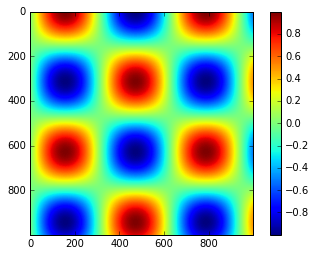

In [3]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar()

## Customizing colorbars

The colormap can be specified using the `cmap `argument. All the available colormaps are in the `plt.cm` namespace.

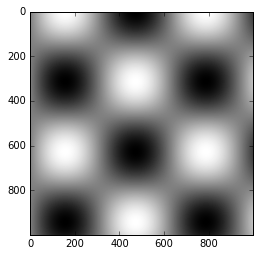

In [4]:
plt.imshow(I, cmap='gray')

### Choosing the colormap

Three different categories of colormaps:

- *Sequential colormaps*: These are made up of one continuous sequence of colors (e.g., `binary` or `viridis`).
- *Divergent colormaps*: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., `RdBu` or `PuOr`).
- *Qualitative colormaps*: these mix colors with no particular sequence (e.g., `rainbow` or `jet`).
    - Qualitative maps are often a poor choice for representing quantitative data 🤪

### Color limits and extensions

The colorbar itself is simply an instance of `plt.Axes`, so all of the axes and tick formatting tricks we've learned are applicable. 

The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the `extend` property.

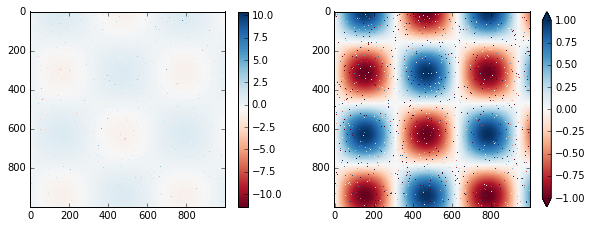

In [5]:
# make n oise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1); # manually set the color limits

- In the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.

- In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits. The result is a much more useful visualization of our data.

## Discrete color bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values. 

The easiest way to do this is to use the `plt.cm.get_cmap()` function, and pass the name of a suitable colormap along with the number of desired bins.

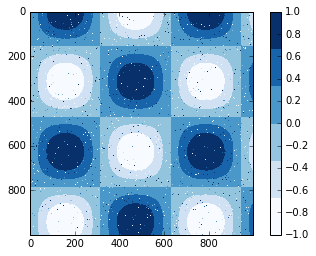

In [6]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## Example: Handwritten Digits

The hand written digits data is included in Scikit-Learn, and consists of nearly 2,000 8×8 thumbnails showing various hand-written digits.

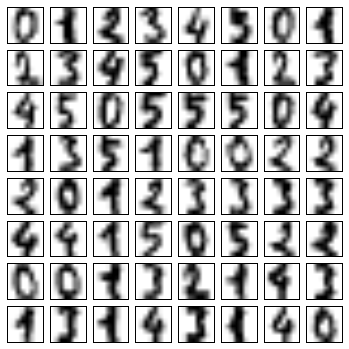

In [8]:
# Load images of the digits 0 through 5 and visualize serveral of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6) # 0 to 5

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Let's take a look at a two-dimensional manifold learning projection of this digits data 

In [9]:
# Project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

Use discrete colormap to view the results, setting the `ticks` and `clim` to improve the aesthetics of the resulting colorbar

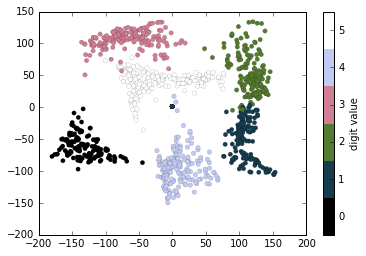

In [16]:
# Plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)